# Data and Libraries Loading

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

import time

In [2]:
df = pd.read_csv("Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# EDA

In [3]:
# Checking null values
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
# Handling date and time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,DateTime
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


In [6]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df.drop(['DateTime'], axis=1, inplace=True)

In [7]:
date_time_columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
df = df[date_time_columns + [col for col in df.columns if col not in date_time_columns]]
df.head()

,Year,Month,Day,Hour,Minute,Second,S1_Temp,S2_Temp,S3_Temp,S4_Temp,...,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017,12,22,10,49,41,24.94,24.75,24.56,25.38,...,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017,12,22,10,50,12,24.94,24.75,24.56,25.44,...,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017,12,22,10,50,42,25.00,24.75,24.50,25.44,...,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017,12,22,10,51,13,25.00,24.75,24.56,25.44,...,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017,12,22,10,51,44,25.00,24.75,24.56,25.44,...,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [8]:
df['Year'].value_counts()

2017    8084
2018    2045
Name: Year, dtype: int64

In [9]:
df['Month'].value_counts()

12    8084
1     2045
Name: Month, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10129 non-null  int64  
 1   Month                 10129 non-null  int64  
 2   Day                   10129 non-null  int64  
 3   Hour                  10129 non-null  int64  
 4   Minute                10129 non-null  int64  
 5   Second                10129 non-null  int64  
 6   S1_Temp               10129 non-null  float64
 7   S2_Temp               10129 non-null  float64
 8   S3_Temp               10129 non-null  float64
 9   S4_Temp               10129 non-null  float64
 10  S1_Light              10129 non-null  int64  
 11  S2_Light              10129 non-null  int64  
 12  S3_Light              10129 non-null  int64  
 13  S4_Light              10129 non-null  int64  
 14  S1_Sound              10129 non-null  float64
 15  S2_Sound           

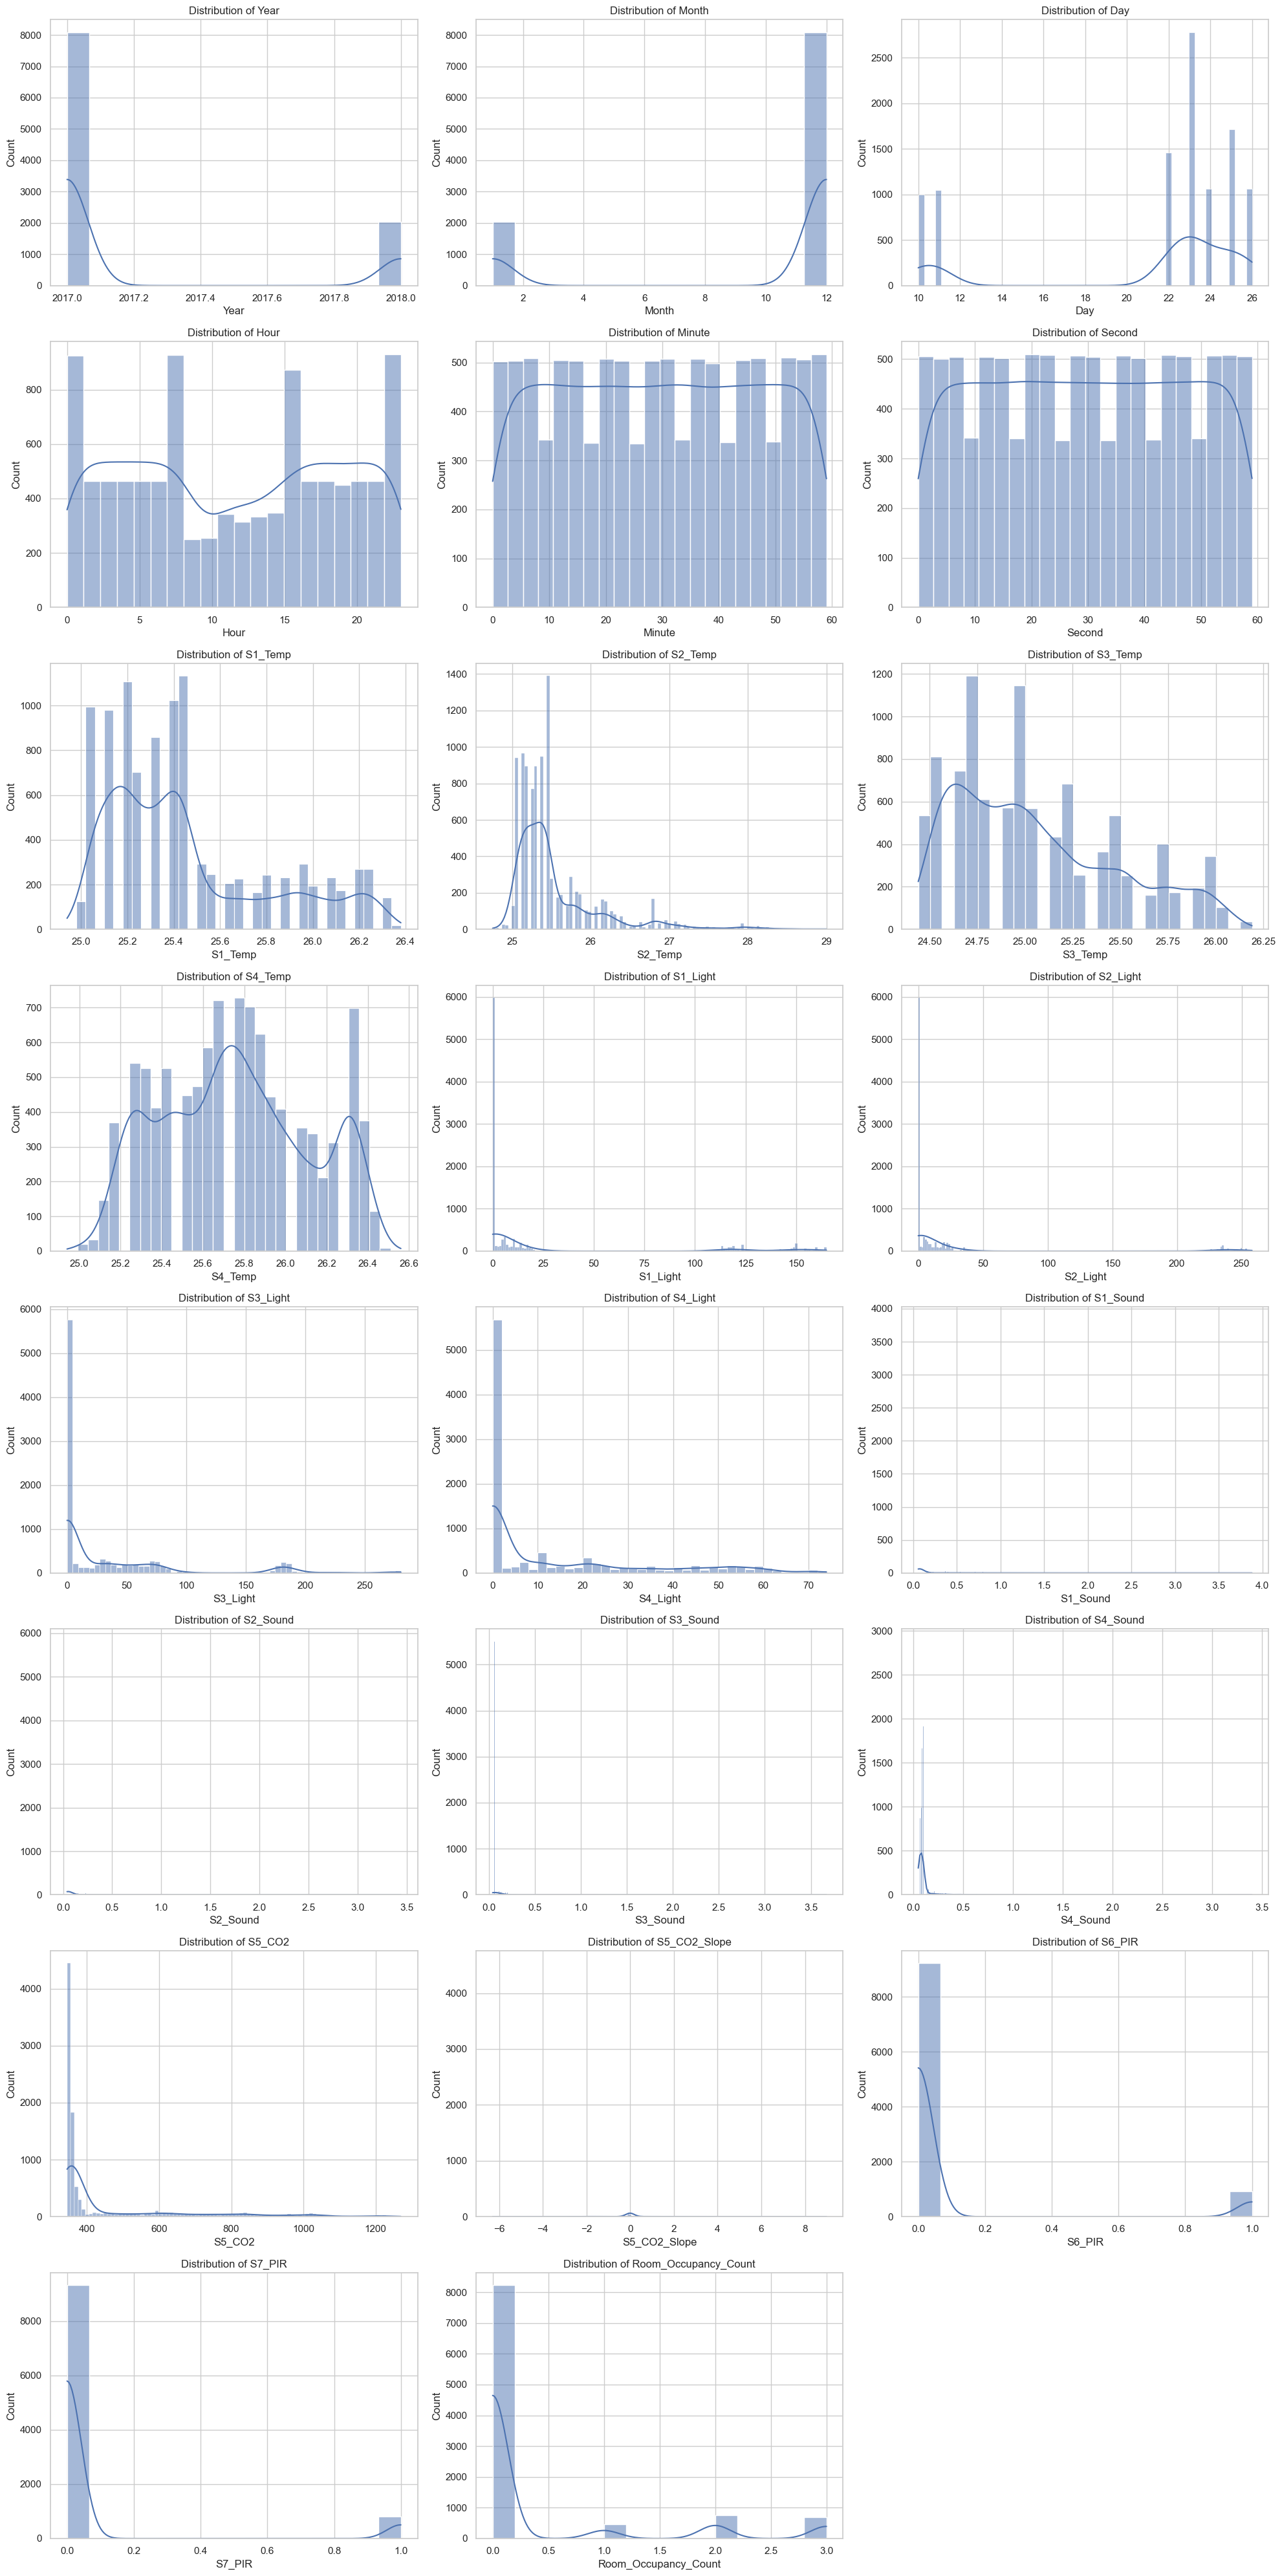

In [11]:
sns.set(style="whitegrid")

num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

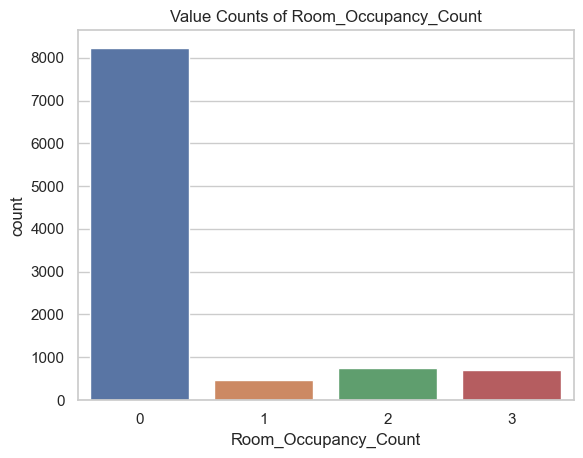

In [12]:
sns.countplot(x='Room_Occupancy_Count', data=df)
plt.title('Value Counts of Room_Occupancy_Count')
plt.show()

In [13]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

Here, the target variable is unbalanced, where one class has dramatically more instances than other classes.

In [14]:
X = df.drop(['Room_Occupancy_Count'], axis = 1)
y = df['Room_Occupancy_Count']

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
y_resampled.value_counts()

1    8228
2    8228
3    8228
0    8228
Name: Room_Occupancy_Count, dtype: int64

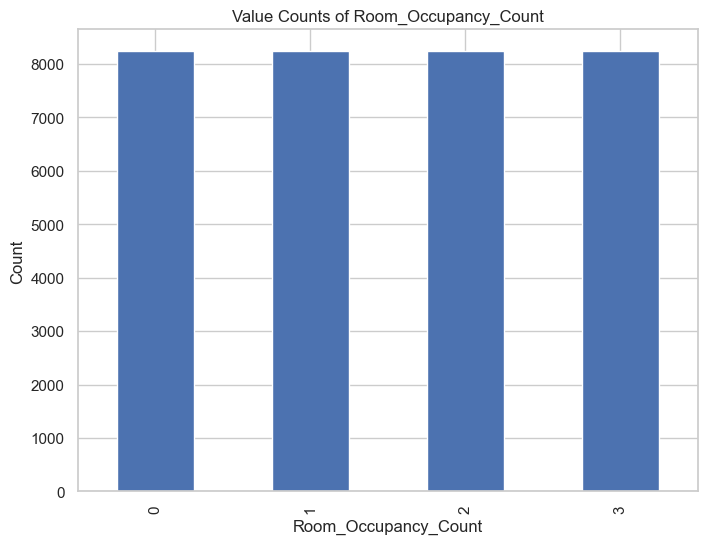

In [17]:
plt.figure(figsize=(8, 6))
y_resampled.value_counts().sort_index().plot(kind='bar')
plt.title('Value Counts of Room_Occupancy_Count')
plt.xlabel('Room_Occupancy_Count')
plt.ylabel('Count')
plt.show()

# Data Splitting and Transformation

In [18]:
# Splitting the data
X = df.drop(['Room_Occupancy_Count'], axis = 1)
y = df['Room_Occupancy_Count']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 42)

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Dummy Classifier
To set baseline metrics

In [22]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier()  
dummy_classifier.fit(X_train_scaled, y_train_resampled)
dummy_predictions = dummy_classifier.predict(X_test_scaled)

dummy_rf_accuracy = accuracy_score(y_test, dummy_predictions)
dummy_rf_precision = precision_score(y_test, dummy_predictions, average = 'macro')
dummy_rf_recall = recall_score(y_test, dummy_predictions, average = 'macro')
dummy_rf_f1 = f1_score(y_test, dummy_predictions, average = 'macro')

print(f"Dummy Classifier Accuracy: {dummy_rf_accuracy}")
print(f"Dummy Classifier Precision: {dummy_rf_precision}")
print(f"Dummy Classifier Recall: {dummy_rf_recall}")
print(f"Dummy Classifier F1: {dummy_rf_f1}")

Dummy Classifier Accuracy: 0.8124383020730503
Dummy Classifier Precision: 0.2031095755182626
Dummy Classifier Recall: 0.25
Dummy Classifier F1: 0.2241285403050109


C:\Users\kkhou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,dummy_predictions)))

Confusion Matrix : 
[[1646    0    0    0]
 [  92    0    0    0]
 [ 149    0    0    0]
 [ 139    0    0    0]]


# Random Forest with Cross Validation

In [24]:
rf = RandomForestClassifier()

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [27]:
start_time = time.time()
grid_search.fit(X_train_scaled, y_train_resampled)
end_time = time.time()

In [28]:
rf_training_time_minutes = (end_time - start_time) / 60

In [29]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.9997720651805168


In [124]:
rf = grid_search.best_estimator_

In [125]:
rf_y_train_pred = rf.predict(X_train_scaled)

In [126]:
rf_accuracy_train = accuracy_score(y_train_resampled, rf_y_train_pred)
rf_precision_train = precision_score(y_train_resampled, rf_y_train_pred, average='macro')
rf_recall_train = recall_score(y_train_resampled, rf_y_train_pred, average='macro')
rf_f1_train = f1_score(y_train_resampled, rf_y_train_pred, average='macro')

In [127]:
print("Random Forest Results on Training Set: ")
print(f"Accuracy: {rf_accuracy_train}")
print(f"Precision: {rf_precision_train}")
print(f"Recall: {rf_recall_train}")
print(f"F1: {rf_f1_train}")

Random Forest Results on Training Set: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [128]:
rf_y_test_pred = rf.predict(X_test_scaled)

In [129]:
rf_accuracy_test = accuracy_score(y_test, rf_y_test_pred)
rf_precision_test = precision_score(y_test, rf_y_test_pred, average='macro')
rf_recall_test = recall_score(y_test, rf_y_test_pred, average='macro')
rf_f1_test = f1_score(y_test, rf_y_test_pred, average='macro')

In [130]:
print("Random Forest Results on Testing Set: ")
print(f"Accuracy: {rf_accuracy_test}")
print(f"Precision: {rf_precision_test}")
print(f"Recall: {rf_recall_test}")
print(f"F1: {rf_f1_test}")

Random Forest Results on Testing Set: 
Accuracy: 0.998025666337611
Precision: 0.9934640522875817
Recall: 0.9928057553956835
F1: 0.9930391066853579


# SVM with Cross Validation

In [37]:
svm = SVC()

In [38]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.01, 0.1, 0.5],
    }

In [39]:
grid_search = GridSearchCV(estimator=svm,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [40]:
start_time = time.time()
grid_search.fit(X_train_scaled, y_train_resampled)
end_time = time.time()

In [41]:
svm_training_time_minutes = (end_time - start_time) / 60

In [42]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.5, 'kernel': 'poly'}
0.9994681859895727


In [131]:
svm = grid_search.best_estimator_

In [132]:
svm_y_train_pred = svm.predict(X_train_scaled)

In [133]:
svm_accuracy_train = accuracy_score(y_train_resampled, svm_y_train_pred)
svm_precision_train = precision_score(y_train_resampled, svm_y_train_pred, average='macro')
svm_recall_train = recall_score(y_train_resampled, svm_y_train_pred, average='macro')
svm_f1_train = f1_score(y_train_resampled, svm_y_train_pred, average='macro')

In [134]:
print("SVM Results on Training Set: ")
print(f"Accuracy: {svm_accuracy_train}")
print(f"Precision: {svm_precision_train}")
print(f"Recall: {svm_recall_train}")
print(f"F1: {svm_f1_train}")

SVM Results on Training Set: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [135]:
svm_y_test_pred = svm.predict(X_test_scaled)

In [136]:
svm_accuracy_test = accuracy_score(y_test, svm_y_test_pred)
svm_precision_test = precision_score(y_test, svm_y_test_pred, average='macro')
svm_recall_test = recall_score(y_test, svm_y_test_pred, average='macro')
svm_f1_test = f1_score(y_test, svm_y_test_pred, average='macro')

In [137]:
print("SVM Results on Testing Set: ")
print(f"Accuracy: {svm_accuracy_test}")
print(f"Precision: {svm_precision_test}")
print(f"Recall: {svm_recall_test}")
print(f"F1: {svm_f1_test}")

SVM Results on Testing Set: 
Accuracy: 0.998025666337611
Precision: 0.9934640522875817
Recall: 0.9928057553956835
F1: 0.9930391066853579


# Gradient Boosting with Cross Validation

In [50]:
gb = GradientBoostingClassifier()

In [51]:
param_grid = {
    'n_estimators': [50, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    }

In [52]:
grid_search = GridSearchCV(estimator=gb,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [53]:
start_time = time.time()
grid_search.fit(X_train_scaled, y_train_resampled)
end_time = time.time()

In [54]:
gb_training_time_minutes = (end_time - start_time) / 60

In [55]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.9997341434747732


In [144]:
gb = grid_search.best_estimator_

In [145]:
gb_y_train_pred = gb.predict(X_train_scaled)

In [146]:
gb_accuracy_train = accuracy_score(y_train_resampled, gb_y_train_pred)
gb_precision_train = precision_score(y_train_resampled, gb_y_train_pred, average='macro')
gb_recall_train = recall_score(y_train_resampled, gb_y_train_pred, average='macro')
gb_f1_train = f1_score(y_train_resampled, gb_y_train_pred, average='macro')

In [147]:
print("Gradient Boosting Results on Training Set: ")
print(f"Accuracy: {gb_accuracy_train}")
print(f"Precision: {gb_precision_train}")
print(f"Recall: {gb_recall_train}")
print(f"F1: {gb_f1_train}")

Gradient Boosting Results on Training Set: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [148]:
gb_y_test_pred = gb.predict(X_test_scaled)

In [149]:
gb_accuracy_test = accuracy_score(y_test, gb_y_test_pred)
gb_precision_test = precision_score(y_test, gb_y_test_pred, average='macro')
gb_recall_test = recall_score(y_test, gb_y_test_pred, average='macro')
gb_f1_test = f1_score(y_test, gb_y_test_pred, average='macro')

In [150]:
print("Gradient Boosting Results on Testing Set: ")
print(f"Accuracy: {gb_accuracy_test}")
print(f"Precision: {gb_precision_test}")
print(f"Recall: {gb_recall_test}")
print(f"F1: {gb_f1_test}")

Gradient Boosting Results on Testing Set: 
Accuracy: 0.998025666337611
Precision: 0.9934640522875817
Recall: 0.9928057553956835
F1: 0.9930391066853579


# XGBoost with Cross Validation

In [63]:
xgb = xgb.XGBClassifier()

In [64]:
param_grid = {
    'n_estimators': [50, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    }

In [65]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [66]:
start_time = time.time()
grid_search.fit(X_train_scaled, y_train_resampled)
end_time = time.time()

In [67]:
xgb_training_time_minutes = (end_time - start_time) / 60

In [68]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 50}
0.9996580976886935


In [69]:
xgb = grid_search.best_estimator_

In [70]:
print(f"Training time: {xgb_training_time_minutes:.2f} minutes")

Training time: 16.46 minutes


In [152]:
xgb_y_train_pred = xgb.predict(X_train_scaled)

In [153]:
xgb_accuracy_train = accuracy_score(y_train_resampled, xgb_y_train_pred)
xgb_precision_train = precision_score(y_train_resampled, xgb_y_train_pred, average='macro')
xgb_recall_train = recall_score(y_train_resampled, xgb_y_train_pred, average='macro')
xgb_f1_train = f1_score(y_train_resampled, xgb_y_train_pred, average='macro')

In [154]:
print("Gradient Boosting Results on Training Set: ")
print(f"Accuracy: {xgb_accuracy_train}")
print(f"Precision: {xgb_precision_train}")
print(f"Recall: {xgb_recall_train}")
print(f"F1: {xgb_f1_train}")

Gradient Boosting Results on Training Set: 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [156]:
xgb_y_test_pred = gb.predict(X_test_scaled)

In [157]:
xgb_accuracy_test = accuracy_score(y_test, xgb_y_test_pred)
xgb_precision_test = precision_score(y_test, xgb_y_test_pred, average='macro')
xgb_recall_test = recall_score(y_test, xgb_y_test_pred, average='macro')
xgb_f1_test = f1_score(y_test, xgb_y_test_pred, average='macro')

In [158]:
print("Gradient Boosting Results on Testing Set: ")
print(f"Accuracy: {xgb_accuracy_test}")
print(f"Precision: {xgb_precision_test}")
print(f"Recall: {xgb_recall_test}")
print(f"F1: {xgb_f1_test}")

Gradient Boosting Results on Testing Set: 
Accuracy: 0.998025666337611
Precision: 0.9934640522875817
Recall: 0.9928057553956835
F1: 0.9930391066853579


# Results

## Confusion Matrix Heatmaps

### Random Forest

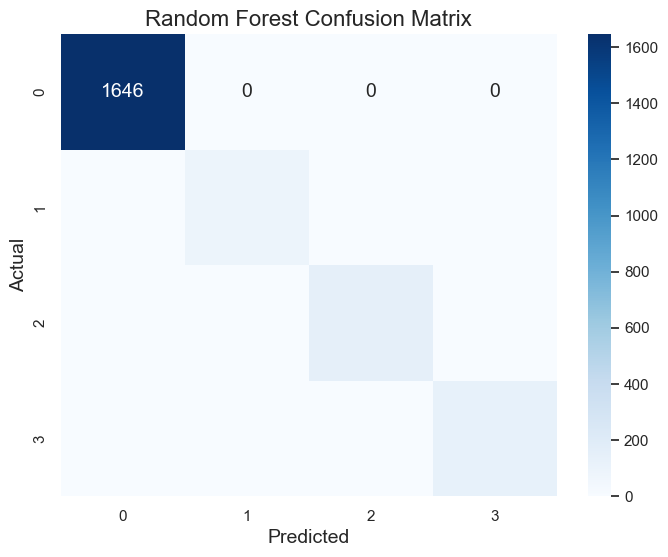

In [159]:
cm_rf = confusion_matrix(y_test, rf_y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### SVM

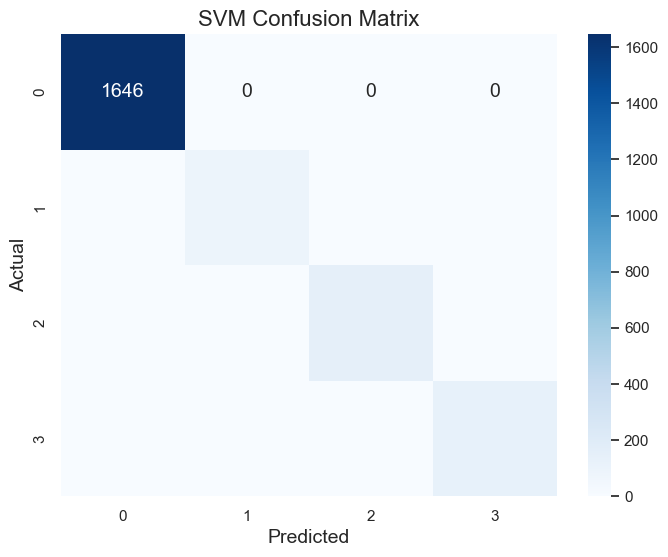

In [161]:
cm_rf = confusion_matrix(y_test, svm_y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title('SVM Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### Gradient Boosting

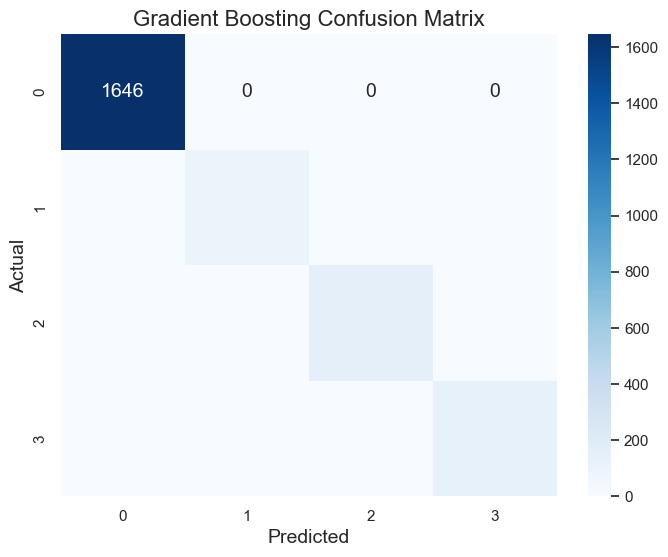

In [162]:
cm_rf = confusion_matrix(y_test, gb_y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title('Gradient Boosting Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### XGBoost

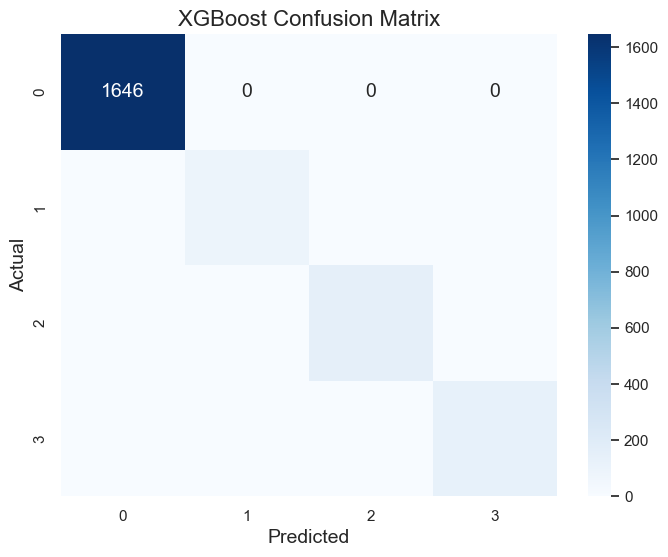

In [163]:
cm_rf = confusion_matrix(y_test, xgb_y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.title('XGBoost Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

##  Receiver Operating Characteristic (ROC) Curves:

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification
from sklearn.ensemble import RandomForestClassifier
def plot_roc_curve(y_test, y_pred):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  #plt.figure(figsize=(10,5))
  plt.figure(dpi=600)
  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

  colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()

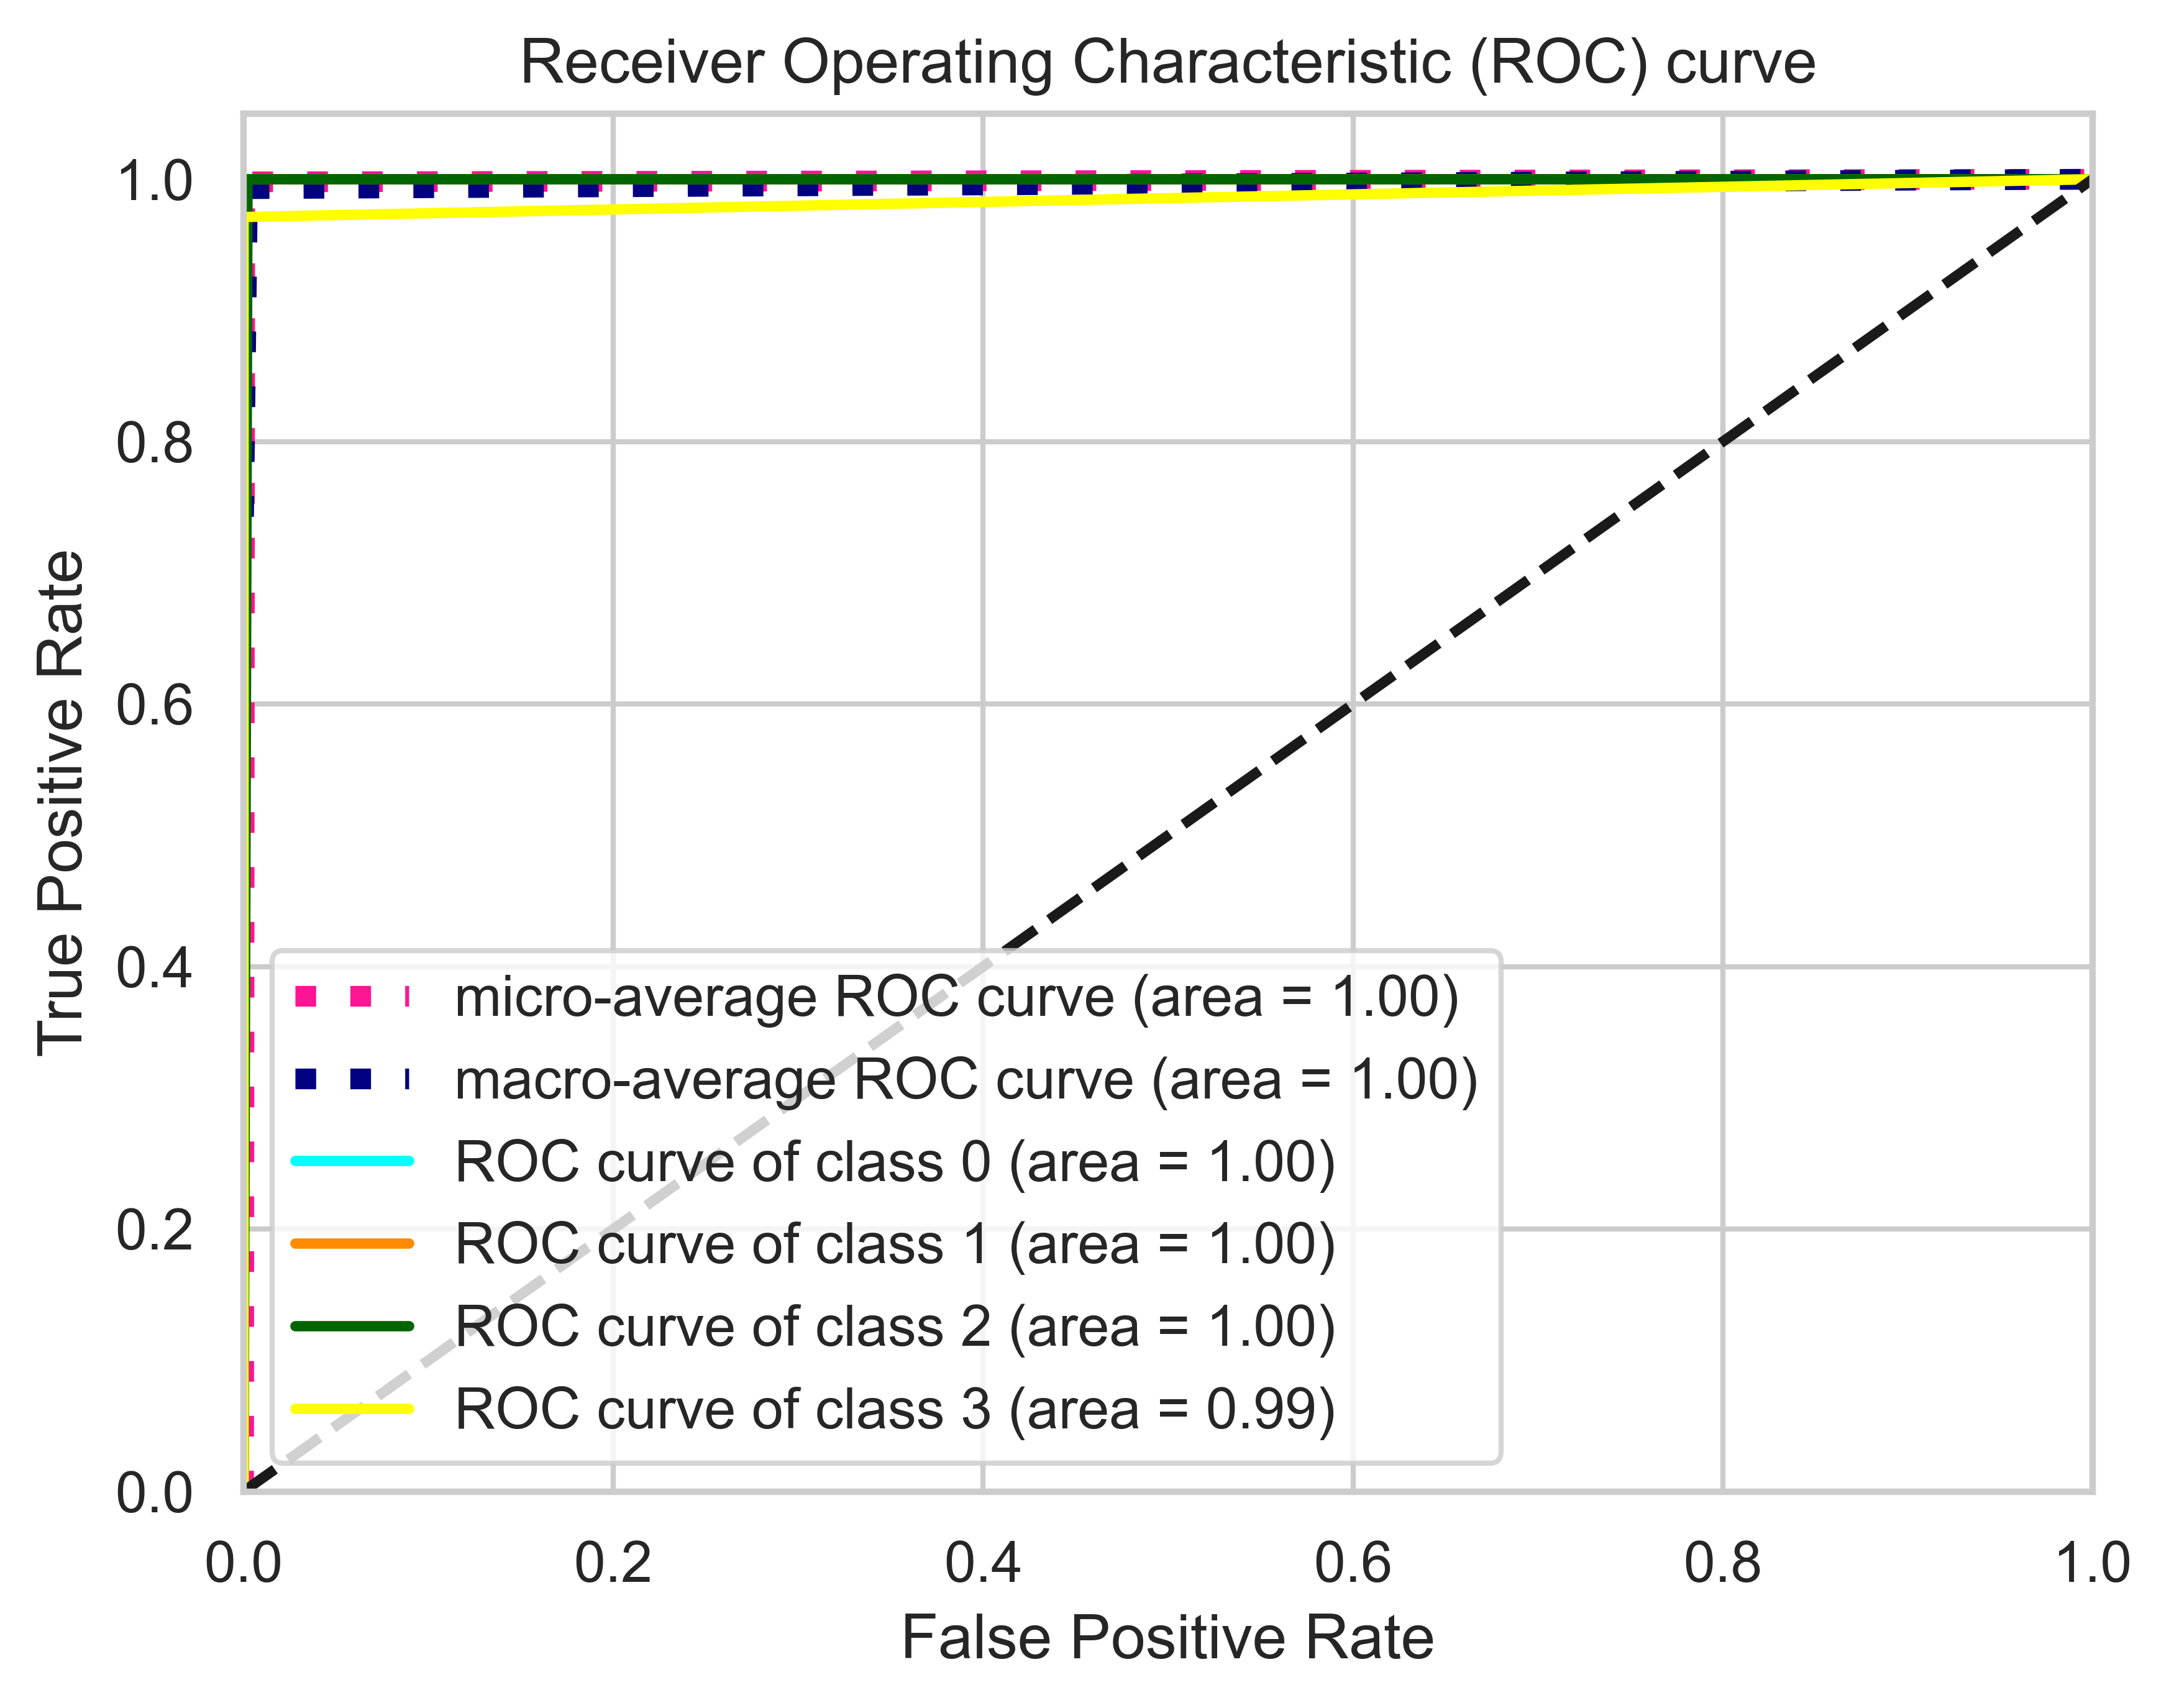

In [186]:
plot_roc_curve(y_test, rf_y_test_pred)

## Feature Importance

In [210]:
feature_names = df.columns[:-1]

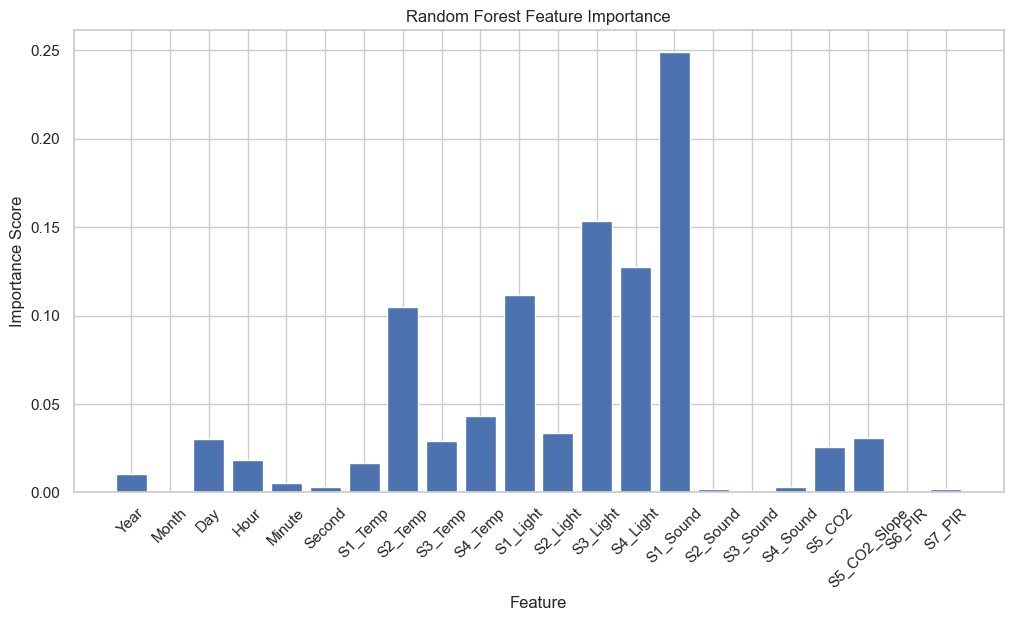

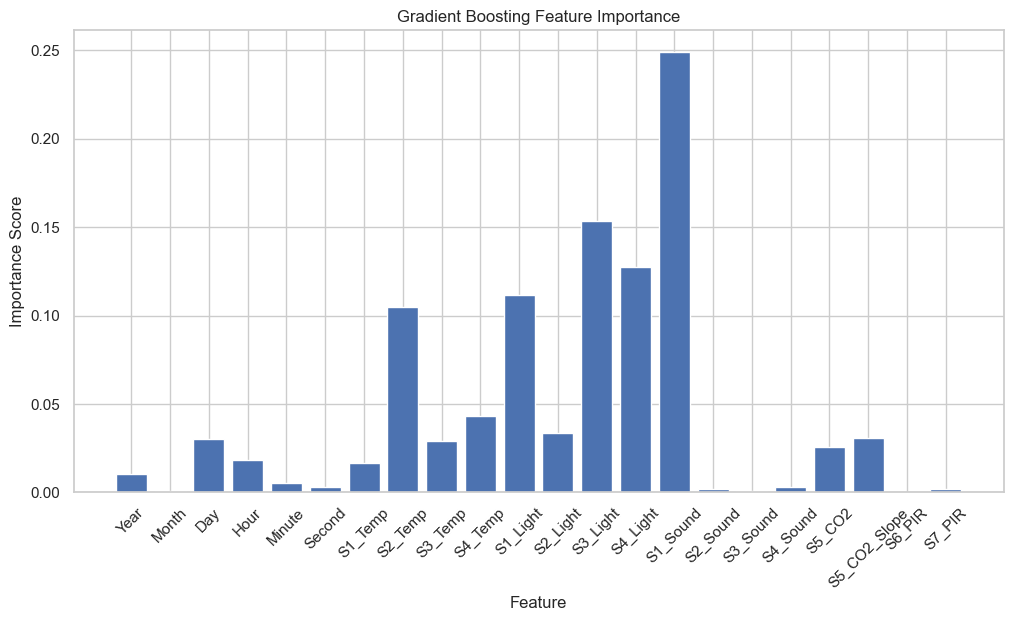

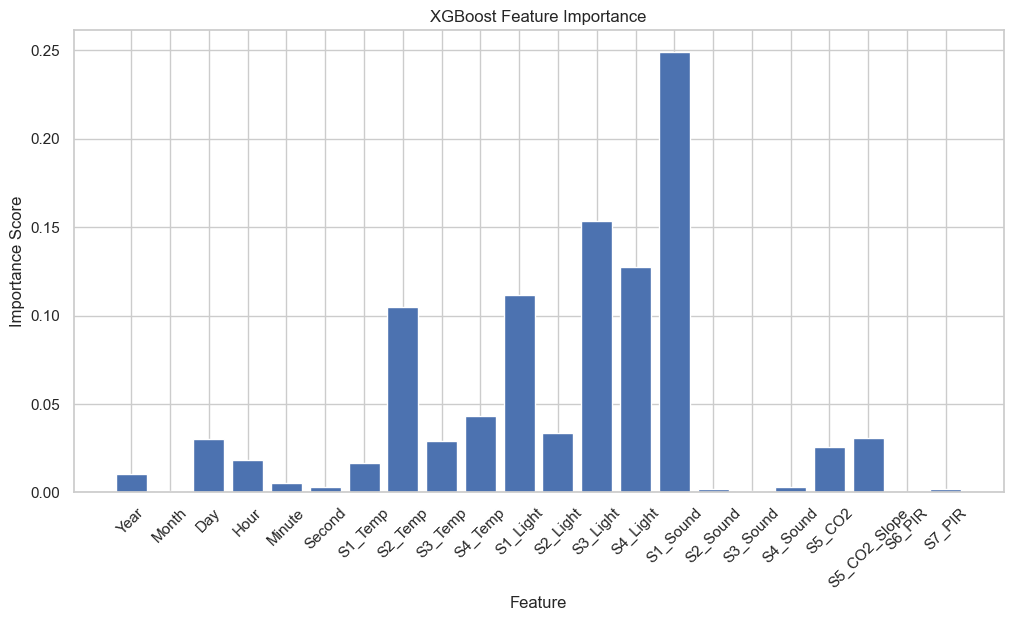

In [211]:
rf_feature_importance = rf.feature_importances_

plt.figure(figsize=(12, 6))
plt.bar(range(len(rf_feature_importance)), rf_feature_importance, align='center')
plt.xticks(range(len(rf_feature_importance)),feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.show()

# Repeat the process for Gradient Boosting (gb)
# 4.1 Extract Feature Importance for Gradient Boosting (gb)
gb_feature_importance = gb.feature_importances_

# 4.2 Plot Bar Chart for Gradient Boosting (gb)
plt.figure(figsize=(12, 6))
plt.bar(range(len(gb_feature_importance)), gb_feature_importance, align='center')
plt.xticks(range(len(gb_feature_importance)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# Repeat the process for XGBoost (xgb)
# 4.1 Extract Feature Importance for XGBoost (xgb)
xgb_feature_importance = xgb.feature_importances_

# 4.2 Plot Bar Chart for XGBoost (xgb)
plt.figure(figsize=(12, 6))
plt.bar(range(len(xgb_feature_importance)), xgb_feature_importance, align='center')
plt.xticks(range(len(xgb_feature_importance)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('XGBoost Feature Importance')
plt.show()


## Models Summary

In [216]:
summary_data = {
    'Model': ['Random Forest' ,'SVM' ,'Gradient Boosting', 'XGBoost'],
    'Accuracy (Training)': [rf_accuracy_train, svm_accuracy_train, gb_accuracy_train, xgb_accuracy_train],
    'Accuracy (Testing)': [rf_accuracy_test, svm_accuracy_test, gb_accuracy_test, xgb_accuracy_test],
    'F1 Score (Training)': [rf_f1_train, svm_f1_train, gb_f1_train, xgb_f1_train],
    'F1 Score (Testing)': [rf_f1_test, rf_f1_test, rf_f1_test, rf_f1_test],
}

summary_table = pd.DataFrame(summary_data)
print(summary_table.to_markdown(index=False))

| Model             |   Accuracy (Training) |   Accuracy (Testing) |   F1 Score (Training) |   F1 Score (Testing) |
|:------------------|----------------------:|---------------------:|----------------------:|---------------------:|
| Random Forest     |                     1 |             0.998026 |                     1 |             0.993039 |
| SVM               |                     1 |             0.998026 |                     1 |             0.993039 |
| Gradient Boosting |                     1 |             0.998026 |                     1 |             0.993039 |
| XGBoost           |                     1 |             0.998026 |                     1 |             0.993039 |
